#### SVM
- 선형이나 비선형 분류, 회귀, 이상치 탐색에서도 사용할 수 있는 다목적 머신러닝 모델, 가장 인기 있는 모델로 복잡한 분류문제에 잘 맞음 작거나 중간크기 데이터셋에 적합
- 라지마진분류
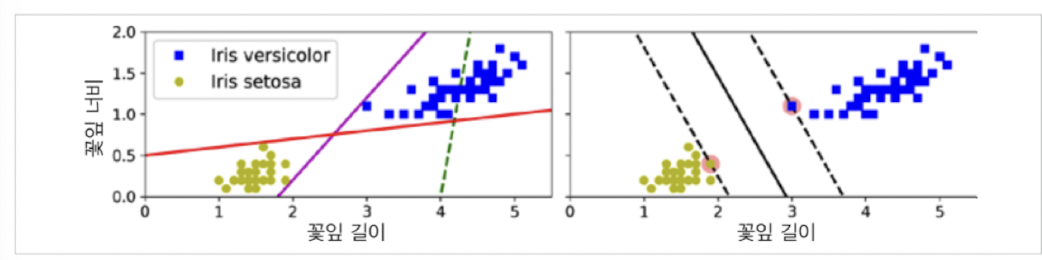
- svm은 특성의 스케일에 만감 standardscaler를 사용하여 스케일 조정하면 경계가 훨씬 좋아짐
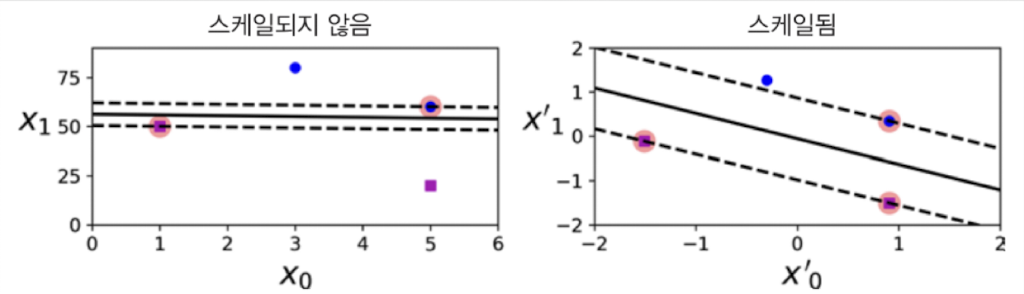

소프트 마진 분류
- 올바르게 분류되어 있다면 하드마진분류
- 데이터가 선형으로 구분될 수 있어야 제대로 작동, 이상치에 민감
- 도로의 폭을 넓게 유지하는것과 마진오류 사이에 적절한 균형을 잡는 분류

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

In [ ]:
iris = datasets.load_iris()
x = iris['data'][:, (2,3)]
y = (iris['target']==2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss = 'hinge')) #SGDClassifier 모델로 대체가능
    # 빠르게 수렴하지 않지만 데이터ㅔㅅㅅ이 아주 커서 메모리에 적재할 수 없거나 
    # 온라인 학습으로 분류문제를 다룰 때 유용
])

svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

#### 비선형 SVM
- 다항 특성과 같은 특성 추가 데이터셋을 2차원으로 구분
- PolynomialFeatures변환기와 StandardScaler, LinearSVC를 연결하여 Pipeline을 만듬

In [ ]:
X,y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)), #PolynomialFeatures 다항회귀(비선형)
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

#### 다항식 커널
- 다항식 특성을 추가하는 것은 간단
- 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현못함
- 높은 차수의 다항식은 굉장히 많은 특성을 추가 하므로 모델 느림
- 커널트릭이라는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과 얻을 수 있음, 엄청난 수의 특성 조합이 생기지는 않음

In [ ]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel = 'poly', degree = 3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#### 유사도 특성
- 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수로 계산하는 특성을 추가

In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    #가우시안 rbf커널 사용해서 유사도 특성 많이 추가하는 것과 비슷한 결과
    ('svm_clf', SVC(kernel = 'rbf', gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

- 가장먼저 선형 커널을 시도 (LinearSVC가 SVC(kernel = 'linear')보다 훨씬 빠름 특히 훈련세트가 아주크거나 특성 수가 많을 경우
- 훈련세트가 너무 크기 않다면 가우시안 RBF 커널도 시도 대부분의 커널이 잘 들어맞습니다. 
- 시간과 컴퓨팅 성능이 충분하다면 교차 검증과 그리드 탐색을 사ㅛㅇ해 다른커널 좀더 시도 
- 훈련데이터 구조에 특화된 커널이 있다면 해당 커널을 테스트

#### SVM 분류를 위한 사이킷런 파이썬 클래스 비교
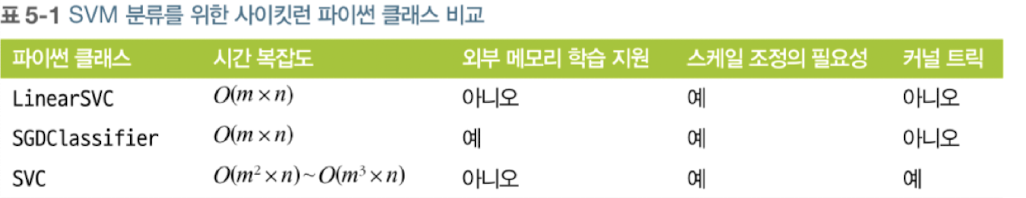

### SVM 회귀
- 분류가 아닌 회귀에 적용하는 방법은 목표를 반대로 하는 것임
- 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류 안에서 도로 안에 최대한 샘플이 많이 들어가도록 학습
- 도로폭은 하이퍼파라미터로 조정
- 마진안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없음 이 모델을 민감하지 않다고 말함
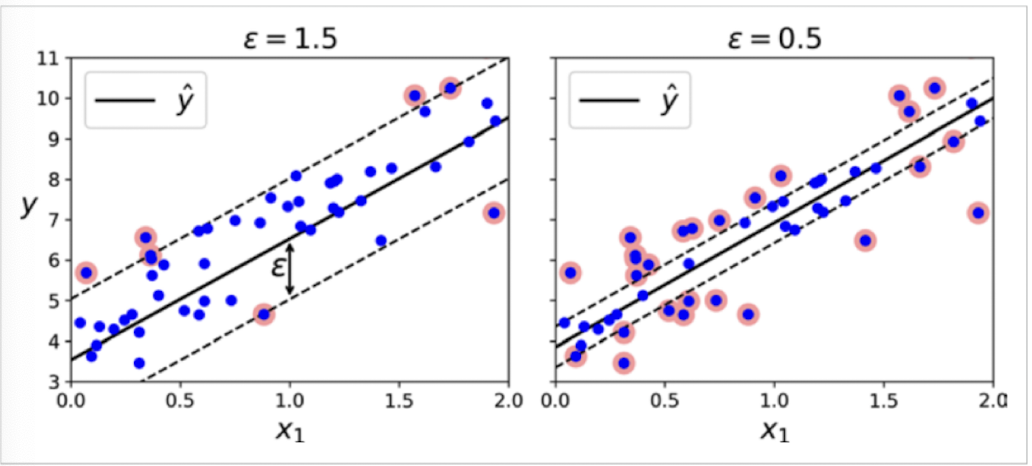

In [ ]:
#SVM 회귀를 적용
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [ ]:
#C 값이 작을 수록 규제가 많아짐
svm_poly_reg = SVR(kernel = 'poly', degree = 2, C = 100, epsilon= 0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')